# Deal with metadata column

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("../data/data_nucl-th_100.json")

df.loc[0, 'metadata']

{'publication_info': [{'journal_volume': '594',
   'page_end': '136',
   'year': 1995,
   'page_start': '117',
   'journal_title': 'Nucl.Phys.A'}],
 'citation_count_without_self_citations': 10,
 'citation_count': 20,
 'authors': [{'raw_affiliations': [{'value': "Departament d'Estructura i Constituents de la Matèria, Universitat de Barcelona, Diagonal 647, E-08028 Barcelona, Spain"}],
   'full_name_unicode_normalized': 'polls, a.',
   'full_name': 'Polls, A.',
   'record': {'$ref': 'https://inspirehep.net/api/authors/1034953'},
   'ids': [{'schema': 'INSPIRE BAI', 'value': 'A.Polls.1'}],
   'last_name': 'Polls',
   'signature_block': 'PALa',
   'first_name': 'A.',
   'uuid': '4c070c40-d8a6-4597-8319-0bff522901c4',
   'recid': 1034953},
  {'raw_affiliations': [{'value': 'Institut für Theoretische Physik, Universität Tübingen, Auf der Morgenstelle 14, D-72076 Tübingen, Germany'}],
   'full_name_unicode_normalized': 'müther, h.',
   'full_name': 'Müther, H.',
   'record': {'$ref': 'https:/

In [3]:
df_metadata = pd.json_normalize(df['metadata'])

In [4]:
for i in df_metadata.columns:
    print(f'{i}: {df_metadata.loc[0,i]}\n')

publication_info: [{'journal_volume': '594', 'page_end': '136', 'year': 1995, 'page_start': '117', 'journal_title': 'Nucl.Phys.A'}]

citation_count_without_self_citations: 10

citation_count: 20

authors: [{'raw_affiliations': [{'value': "Departament d'Estructura i Constituents de la Matèria, Universitat de Barcelona, Diagonal 647, E-08028 Barcelona, Spain"}], 'full_name_unicode_normalized': 'polls, a.', 'full_name': 'Polls, A.', 'record': {'$ref': 'https://inspirehep.net/api/authors/1034953'}, 'ids': [{'schema': 'INSPIRE BAI', 'value': 'A.Polls.1'}], 'last_name': 'Polls', 'signature_block': 'PALa', 'first_name': 'A.', 'uuid': '4c070c40-d8a6-4597-8319-0bff522901c4', 'recid': 1034953}, {'raw_affiliations': [{'value': 'Institut für Theoretische Physik, Universität Tübingen, Auf der Morgenstelle 14, D-72076 Tübingen, Germany'}], 'full_name_unicode_normalized': 'müther, h.', 'full_name': 'Müther, H.', 'record': {'$ref': 'https://inspirehep.net/api/authors/996373'}, 'ids': [{'schema': 'INSP

From the data, I don't need to json-normalize deeper. Let's combine the two dataframes.

In [5]:
df_dropped = df.drop('metadata', axis=1)

df = pd.concat([df_dropped, df_metadata], axis=1)

df.head()

,id,links,updated,created,publication_info,citation_count_without_self_citations,citation_count,authors,report_numbers,citeable,...,_oai.updated,license,thesis_info.institutions,thesis_info.date,thesis_info.degree_type,record_affiliations,persistent_identifiers,isbns,supervisors,book_series
0,1459726,{'bibtex': 'https://inspirehep.net/api/literat...,2024-05-07T08:50:24.810153+00:00,2016-05-18T00:00:00+00:00,"[{'journal_volume': '594', 'page_end': '136', ...",10,20,"[{'raw_affiliations': [{'value': ""Departament ...",[{'value': 'TU-95-0328'}],True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1459842,{'bibtex': 'https://inspirehep.net/api/literat...,2024-05-07T09:32:13.195422+00:00,2016-05-18T00:00:00+00:00,"[{'journal_volume': '351', 'page_end': '5', 'y...",4,4,[{'raw_affiliations': [{'value': 'Institute of...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1460442,{'bibtex': 'https://inspirehep.net/api/literat...,2024-05-07T09:32:06.686143+00:00,2016-05-19T00:00:00+00:00,"[{'journal_volume': '344', 'page_end': '34', '...",47,51,[{'raw_affiliations': [{'value': 'Department o...,[{'value': 'MCGILL-94-43'}],True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,392718,{'bibtex': 'https://inspirehep.net/api/literat...,2023-03-06T17:45:25.590277+00:00,1995-02-14T00:00:00+00:00,"[{'journal_volume': '340', 'page_end': '320', ...",1,1,[{'raw_affiliations': [{'value': 'Institut für...,[{'value': 'HD-TVP-95-1'}],True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,397533,{'bibtex': 'https://inspirehep.net/api/literat...,2024-05-07T10:36:27.392018+00:00,1995-07-25T00:00:00+00:00,"[{'journal_volume': '363', 'page_end': '4', 'y...",65,67,[{'raw_affiliations': [{'value': 'High-Energy ...,[{'value': 'DUKE-TH-95-94'}],True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(3100, 65)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     3100 non-null   int64  
 1   links                                  3100 non-null   object 
 2   updated                                3100 non-null   object 
 3   created                                3100 non-null   object 
 4   publication_info                       3097 non-null   object 
 5   citation_count_without_self_citations  3100 non-null   int64  
 6   citation_count                         3100 non-null   int64  
 7   authors                                3100 non-null   object 
 8   report_numbers                         570 non-null    object 
 9   citeable                               3099 non-null   object 
 10  copyright                              1109 non-null   object 
 11  $sch

In [8]:
df.columns

Index(['id', 'links', 'updated', 'created', 'publication_info',
       'citation_count_without_self_citations', 'citation_count', 'authors',
       'report_numbers', 'citeable', 'copyright', '$schema', 'references',
       'number_of_pages', 'legacy_creation_date', 'preprint_date',
       'author_count', 'public_notes', 'earliest_date', 'refereed',
       'external_system_identifiers', 'facet_author_name',
       'journal_title_variants', 'arxiv_eprints', 'referenced_authors_bais',
       'legacy_version', 'inspire_categories', 'control_number', 'dois',
       'document_type', 'texkeys', 'abstracts', 'primary_arxiv_category',
       'titles', 'imprints', 'curated', 'first_author.full_name',
       'first_author.last_name', 'first_author.first_name',
       'first_author.recid', 'first_author.emails', 'keywords', 'core',
       'publication_type', 'first_author.affiliations_identifiers',
       'first_author.ids', 'deleted_records', 'documents', 'figures',
       'energy_ranges', 'urls'

In [10]:
df.select_dtypes(exclude=['object']).nunique()

id                                       3100
citation_count_without_self_citations     202
citation_count                            220
number_of_pages                            99
author_count                               20
control_number                           3100
curated                                     2
first_author.recid                       1973
dtype: int64

In [11]:
df.describe()

,id,citation_count_without_self_citations,citation_count,number_of_pages,author_count,control_number,first_author.recid
count,3.100000e+03,3100.000000,3100.000000,3059.000000,3100.000000,3.100000e+03,3.100000e+03
mean,1.174032e+06,23.508387,31.666129,15.694345,3.121613,1.174032e+06,1.366220e+06
std,7.145695e+05,65.595445,73.015652,71.628879,2.094966,7.145695e+05,5.213788e+05
min,4.000100e+04,0.000000,0.000000,1.000000,1.000000,4.000100e+04,9.818900e+05
25%,5.932238e+05,2.000000,3.000000,6.000000,2.000000,5.932238e+05,1.008893e+06
50%,8.572395e+05,7.000000,13.000000,10.000000,3.000000,8.572395e+05,1.040380e+06
75%,1.663658e+06,23.000000,33.000000,16.000000,4.000000,1.663658e+06,1.819034e+06
max,2.973744e+06,2317.000000,2329.000000,3826.000000,32.000000,2.973744e+06,2.970726e+06


We don't need more data than this dataset. It includes all important information for papers (citations, number of references, number of pages, article type, etc). If we need it more, I can get more samples, or other primary subjects, we can use the code above.

# Choose relevant columns

There are many columns which are unrelated to our research, such as `updated` or `created`. Therefore, let us choose relevant columns first from our background knowledge and research.

In [15]:
for col in df.columns:
    print(f"{col}: {df.loc[0, col]}\n")

id: 1459726

links: {'bibtex': 'https://inspirehep.net/api/literature/1459726?format=bibtex', 'latex-eu': 'https://inspirehep.net/api/literature/1459726?format=latex-eu', 'latex-us': 'https://inspirehep.net/api/literature/1459726?format=latex-us', 'json': 'https://inspirehep.net/api/literature/1459726?format=json', 'json-expanded': 'https://inspirehep.net/api/literature/1459726?format=json-expanded', 'cv': 'https://inspirehep.net/api/literature/1459726?format=cv', 'citations': 'https://inspirehep.net/api/literature/?q=refersto%3Arecid%3A1459726'}

updated: 2024-05-07T08:50:24.810153+00:00

created: 2016-05-18T00:00:00+00:00

publication_info: [{'journal_volume': '594', 'page_end': '136', 'year': 1995, 'page_start': '117', 'journal_title': 'Nucl.Phys.A'}]

citation_count_without_self_citations: 10

citation_count: 20

authors: [{'raw_affiliations': [{'value': "Departament d'Estructura i Constituents de la Matèria, Universitat de Barcelona, Diagonal 647, E-08028 Barcelona, Spain"}], 'ful

In [16]:
relevant_columns = ['id', 'publication_info', 'citation_count_without_self_citations', 'citation_count', 'authors', 'citeable', 'references',
                    'number_of_pages', 'preprint_date', 'author_count', 'refereed', 'journal_title_variants', 'arxiv_eprints',
                    'document_type', 'primary_arxiv_category', 'publication_type']

df = df[relevant_columns]

In [19]:
df.head()

,id,publication_info,citation_count_without_self_citations,citation_count,authors,citeable,references,number_of_pages,preprint_date,author_count,refereed,journal_title_variants,arxiv_eprints,document_type,primary_arxiv_category,publication_type
0,1459726,"[{'journal_volume': '594', 'page_end': '136', ...",10,20,"[{'raw_affiliations': [{'value': ""Departament ...",True,"[{'reference': {'label': '1', 'publication_inf...",20.0,1995-03-28,3,True,"[Nucl. Phys. A, Nucl.Phys.A]","[{'categories': ['nucl-th'], 'value': 'nucl-th...",[article],[nucl-th],NaN
1,1459842,"[{'journal_volume': '351', 'page_end': '5', 'y...",4,4,[{'raw_affiliations': [{'value': 'Institute of...,True,"[{'reference': {'label': '1', 'publication_inf...",5.0,1995-04-07,2,True,"[Phys. Lett. B, Phys.Lett.B]","[{'categories': ['nucl-th'], 'value': 'nucl-th...",[article],[nucl-th],NaN
2,1460442,"[{'journal_volume': '344', 'page_end': '34', '...",47,51,[{'raw_affiliations': [{'value': 'Department o...,True,"[{'reference': {'label': '1', 'publication_inf...",6.0,1995-01-17,2,True,"[Phys. Lett. B, Phys.Lett.B]","[{'categories': ['nucl-th'], 'value': 'nucl-th...",[article],[nucl-th],NaN
3,392718,"[{'journal_volume': '340', 'page_end': '320', ...",1,1,[{'raw_affiliations': [{'value': 'Institut für...,True,[{'reference': {'publication_info': {'journal_...,12.0,1995-01,2,NaN,"[AIP Conf.Proc., AIP Conf. Proc.]","[{'categories': ['nucl-th'], 'value': 'nucl-th...",[conference paper],[nucl-th],NaN
4,397533,"[{'journal_volume': '363', 'page_end': '4', 'y...",65,67,[{'raw_affiliations': [{'value': 'High-Energy ...,True,[{'reference': {'publication_info': {'journal_...,4.0,1995-07,2,True,"[Phys. Lett. B, Phys.Lett.B]","[{'categories': ['nucl-th'], 'value': 'nucl-th...",[article],[nucl-th],NaN


Check `publication_type` is all NaN:

In [21]:
df['publication_type'].isna().sum() # != 3100

np.int64(3025)

We choose papers whose primary_arxiv_category is ['nucl-th']. Let's check this and if it is all ['nucl-th'], drop this column.

In [23]:
df['primary_arxiv_category'].apply(lambda x: x== ['nucl-th']).sum() # Yes

np.int64(3100)

In [24]:
df=df.drop('primary_arxiv_category', axis=1)

# Check Duplicates

In [25]:
# Check duplicates

df.select_dtypes(exclude=['object']).duplicated().sum() # 0 means there is no duplicate.

np.int64(0)

# Take care of NaNs

Then we have to take care of `NaN`. Since the dataset have much information, if we can deduce it from other columns, fill it. If we cannot deduce it and if it is in important columns, such as `number of references`, we should drop that row. If they can be replaced from mean or mode, we will use it.

In [26]:
df.isnull().sum()

id                                          0
publication_info                            3
citation_count_without_self_citations       0
citation_count                              0
authors                                     0
citeable                                    1
references                                  4
number_of_pages                            41
preprint_date                               1
author_count                                0
refereed                                  591
journal_title_variants                     76
arxiv_eprints                               0
document_type                               0
publication_type                         3025
dtype: int64

In [27]:
# Columns with NaN

df.columns[df.isna().any()]

Index(['publication_info', 'citeable', 'references', 'number_of_pages',
       'preprint_date', 'refereed', 'journal_title_variants',
       'publication_type'],
      dtype='object')

First, we can get the number of references only from `references`, which is the most important column. Therefore we should drop these rows.

In [30]:
df[df['references'].isnull()]

,id,publication_info,citation_count_without_self_citations,citation_count,authors,citeable,references,number_of_pages,preprint_date,author_count,refereed,journal_title_variants,arxiv_eprints,document_type,publication_type
700,595375,"[{'journal_volume': '638', 'page_end': '242', ...",0,0,[{'affiliations_identifiers': [{'schema': 'ROR...,True,NaN,3.0,2002-09,2,NaN,"[AIP Conf.Proc., AIP Conf. Proc.]","[{'categories': ['nucl-th'], 'value': 'nucl-th...",[conference paper],NaN
2335,1645684,"[{'journal_volume': '42', 'artid': '034101', '...",3,5,[{'raw_affiliations': [{'value': 'Department o...,True,NaN,6.0,2018-01-02,2,True,"[Chin.Phys.C, Chin. Phys. C]","[{'categories': ['nucl-th'], 'value': '1801.00...",[article],NaN
2633,1862315,"[{'journal_volume': '32', 'artid': '118', 'yea...",48,60,"[{'full_name_unicode_normalized': 'gao, zepeng...",True,NaN,NaN,2021-05-06,6,True,"[Nucl.Sci.Tech., Nucl. Sci. Tech.]","[{'categories': ['nucl-th'], 'value': '2105.02...",[article],NaN
2941,2756268,"[{'page_end': '293', 'year': 2025, 'parent_isb...",37,61,[{'raw_affiliations': [{'value': 'University o...,NaN,NaN,41.0,2024-02-06,6,True,"[Int. J. Mod. Phys. E, Int.J.Mod.Phys.E]","[{'categories': ['nucl-th'], 'value': '2402.04...",[book chapter],NaN


In [ ]:
df = df.drop(index=[700, 2335, 2633, 2941])

In [32]:
print(f"df.shape: {df.shape}")

df.isnull().sum()

df.shape: (3096, 15)


id                                          0
publication_info                            3
citation_count_without_self_citations       0
citation_count                              0
authors                                     0
citeable                                    0
references                                  0
number_of_pages                            40
preprint_date                               1
author_count                                0
refereed                                  590
journal_title_variants                     76
arxiv_eprints                               0
document_type                               0
publication_type                         3021
dtype: int64

Let us check `document_type` first. It looks like most of them has a single element.

In [38]:
df[df['document_type'].apply(lambda x: len(x))!=1]

,id,publication_info,citation_count_without_self_citations,citation_count,authors,citeable,references,number_of_pages,preprint_date,author_count,refereed,journal_title_variants,arxiv_eprints,document_type,publication_type
615,553422,"[{'journal_volume': '5', 'page_end': '87', 'co...",4,4,[{'raw_affiliations': [{'value': 'Physics Divi...,True,[{'reference': {'publication_info': {'journal_...,9.0,2001-07,2,NaN,"[Ser. Adv. Quant. Many Body Theor., Ser.Adv.Qu...","[{'categories': ['nucl-th'], 'value': 'nucl-th...","[conference paper, book chapter]",NaN
1118,709937,"[{'journal_volume': '8', 'page_end': '89', 'co...",18,19,[{'raw_affiliations': [{'value': 'Institut für...,True,[{'reference': {'arxiv_eprint': 'hep-ph/001133...,27.0,2006-02,5,NaN,"[Ser. Adv. Quant. Many Body Theor., Ser.Adv.Qu...","[{'categories': ['nucl-th'], 'value': 'nucl-th...","[conference paper, book chapter]",NaN
1669,939659,"[{'page_end': '343', 'year': 2011, 'page_start...",1,1,[{'raw_affiliations': [{'value': 'Department o...,True,[{'reference': {'publication_info': {'journal_...,27.0,2011-10,2,NaN,NaN,"[{'categories': ['nucl-th'], 'value': '1110.30...","[conference paper, book chapter]",NaN
2781,2080270,"[{'journal_volume': '97', 'artid': '064007', '...",1,1,[{'raw_affiliations': [{'value': 'Department o...,True,[{'reference': {'dois': ['10.1103/PhysRevC.72....,10.0,2022-05-11,7,True,"[Phys. Scripta, Phys.Scripta]","[{'categories': ['nucl-th', 'hep-ph'], 'value'...","[article, conference paper]",NaN
2996,2772863,"[{'journal_volume': '99', 'artid': '125311', '...",1,3,[{'raw_affiliations': [{'value': 'Department o...,True,[{'reference': {'dois': ['10.1088/1361-6471/aa...,13.0,2024-03-27,7,True,"[Phys.Scripta, Phys. Scripta]","[{'categories': ['nucl-th'], 'value': '2404.00...","[article, conference paper]",NaN
3002,2918150,"[{'journal_volume': '4', 'artid': '100100', 'm...",0,0,[{'raw_affiliations': [{'source': 'Elsevier Lt...,True,"[{'reference': {'arxiv_eprint': '1301.2826', '...",NaN,2025-05-05,2,True,"[J.Subatomic Part.Cosmol., J. Subatomic Part. ...","[{'categories': ['nucl-th', 'nucl-ex'], 'value...","[article, conference paper]",NaN


For conference papers, they often are published as a book, so we will replace them with a conference paper. Since the document type with [article, conference paper] are refereed, we will consider them as regular articles.

In [39]:
df['document_type'] = df['document_type'].apply(lambda x: x[0])

Let us check NaN in `journal_title_variant`.

In [40]:
df[df['journal_title_variants'].isnull()]

,id,publication_info,citation_count_without_self_citations,citation_count,authors,citeable,references,number_of_pages,preprint_date,author_count,refereed,journal_title_variants,arxiv_eprints,document_type,publication_type
17,392650,"[{'page_end': '644', 'conference_record': {'$r...",0,0,[{'affiliations_identifiers': [{'schema': 'ROR...,True,[{'reference': {'publication_info': {'journal_...,7.0,1995-02-08,1,NaN,NaN,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,NaN
145,419365,[{'conference_record': {'$ref': 'https://inspi...,2,2,[{'affiliations_identifiers': [{'schema': 'ROR...,True,[{'reference': {'publication_info': {'journal_...,6.0,NaN,2,NaN,NaN,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,NaN
600,558362,"[{'page_end': '92', 'conference_record': {'$re...",0,1,[{'affiliations_identifiers': [{'schema': 'ROR...,True,[{'reference': {'publication_info': {'journal_...,10.0,2001-06,5,NaN,NaN,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,NaN
601,555268,"[{'page_end': '108', 'conference_record': {'$r...",2,2,[{'raw_affiliations': [{'value': 'Dept. of Phy...,True,[{'reference': {'arxiv_eprint': 'nucl-th/98070...,8.0,2001-04,1,NaN,NaN,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,NaN
602,554490,"[{'page_end': '196', 'conference_record': {'$r...",0,0,[{'affiliations_identifiers': [{'schema': 'ROR...,True,[{'reference': {'publication_info': {'journal_...,4.0,2001-03,2,NaN,NaN,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2680186,[{'year': 2023}],0,0,[{'raw_affiliations': [{'value': 'University o...,True,[{'reference': {'dois': ['10.1016/j.cpc.2015.0...,179.0,2023-07-26,1,NaN,NaN,"[{'categories': ['nucl-th'], 'value': '2307.14...",thesis,NaN
2802,2740709,[{'year': 2023}],0,0,[{'affiliations_identifiers': [{'schema': 'ROR...,True,[{'reference': {'dois': ['10.1103/PhysRevC.105...,198.0,2023-12-22,1,NaN,NaN,"[{'categories': ['nucl-th', 'hep-ph', 'nucl-ex...",thesis,NaN
2841,2679570,[{'year': 2023}],0,0,[{'raw_affiliations': [{'value': 'University o...,True,[{'reference': {'imprint': {'publisher': 'Worl...,111.0,2025-01-20,1,NaN,NaN,"[{'categories': ['nucl-th'], 'value': '2501.13...",thesis,NaN
2874,2788951,[{'year': 2023}],1,1,[{'raw_affiliations': [{'value': 'U. Valencia ...,True,[{'reference': {'dois': ['10.1093/ptep/ptac097...,176.0,2024-08-09,1,NaN,NaN,"[{'categories': ['nucl-th'], 'value': '2408.05...",thesis,NaN


In [41]:
(df[df['journal_title_variants'].isnull()])['document_type'].unique()

array(['conference paper', 'thesis', 'book chapter'], dtype=object)

Anyway, it is not important to have `journal_title_variants` for our study now. Remove this column.

In [42]:
df = df.drop('journal_title_variants', axis=1)

df.isnull().sum()

id                                          0
publication_info                            3
citation_count_without_self_citations       0
citation_count                              0
authors                                     0
citeable                                    0
references                                  0
number_of_pages                            40
preprint_date                               1
author_count                                0
refereed                                  590
arxiv_eprints                               0
document_type                               0
publication_type                         3021
dtype: int64

Next, let us check the refereed column.

In [44]:
df['refereed'].unique()

array([True, nan, False], dtype=object)

In [45]:
df[df['refereed'].isnull()]

,id,publication_info,citation_count_without_self_citations,citation_count,authors,citeable,references,number_of_pages,preprint_date,author_count,refereed,arxiv_eprints,document_type,publication_type
3,392718,"[{'journal_volume': '340', 'page_end': '320', ...",1,1,[{'raw_affiliations': [{'value': 'Institut für...,True,[{'reference': {'publication_info': {'journal_...,12.0,1995-01,2,NaN,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,NaN
9,1342572,"[{'journal_volume': '588', 'page_end': '478', ...",2,6,[{'raw_affiliations': [{'value': 'Dipartimento...,True,[{'reference': {'imprint': {'publisher': 'Berl...,15.0,1995-02-28,2,NaN,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,NaN
10,1485609,"[{'journal_volume': '342', 'page_end': '542', ...",0,0,[{'raw_affiliations': [{'value': 'Instituto de...,True,"[{'reference': {'label': '1', 'publication_inf...",7.0,1995-01-26,3,NaN,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,NaN
17,392650,"[{'page_end': '644', 'conference_record': {'$r...",0,0,[{'affiliations_identifiers': [{'schema': 'ROR...,True,[{'reference': {'publication_info': {'journal_...,7.0,1995-02-08,1,NaN,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,NaN
36,395071,"[{'journal_volume': '1', 'page_end': '322', 'y...",119,164,"[{'full_name_unicode_normalized': 'rischke, di...",True,[{'reference': {'publication_info': {'journal_...,18.0,1995-05,5,NaN,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",article,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,2745619,"[{'journal_volume': '292', 'artid': '06003', '...",1,5,[{'affiliations_identifiers': [{'schema': 'ROR...,True,[{'reference': {'dois': ['10.1103/PhysRevLett....,7.0,2024-01-10,6,NaN,"[{'categories': ['nucl-th'], 'value': '2401.05...",conference paper,NaN
2916,2752437,"[{'journal_volume': '303', 'artid': '04002', '...",0,1,[{'raw_affiliations': [{'value': 'Institute fo...,True,"[{'reference': {'arxiv_eprint': '2401.16995', ...",7.0,2024-01-28,5,NaN,"[{'categories': ['nucl-th', 'nucl-ex'], 'value...",conference paper,NaN
2935,2773219,"[{'journal_volume': '292', 'artid': '04001', '...",0,2,[{'raw_affiliations': [{'value': 'Institut für...,True,"[{'reference': {'arxiv_eprint': '1803.06290', ...",8.0,2024-05-08,5,NaN,"[{'categories': ['nucl-th', 'nucl-ex'], 'value...",conference paper,NaN
2993,2811022,"[{'journal_volume': '302', 'artid': '07014', '...",0,0,"[{'raw_affiliations': [{'value': 'CEA, DES, IR...",True,[{'reference': {'imprint': {'publisher': 'Worl...,9.0,2024-07-25,4,NaN,"[{'categories': ['nucl-th'], 'value': '2407.17...",conference paper,NaN


In [46]:
df[df['refereed'].isnull()]['document_type'].value_counts()

document_type
conference paper    536
thesis               26
article              21
book chapter          7
Name: count, dtype: int64

In physics, conference papers are not refereed as computer science. Theses are refereed by their commitees. Book chapters are not refereed. Let us change them first and check articles.

In [48]:
df.loc[(df['refereed'].isnull()) & (df['document_type'] == 'conference paper'), 'refereed'] = False
df.loc[(df['refereed'].isnull()) & (df['document_type'] == 'thesis'), 'refereed'] = True
df.loc[(df['refereed'].isnull()) & (df['document_type'] == 'book chapter'), 'refereed'] = False

Let us check articles.

In [49]:
for index, row in df[(df['refereed'].isnull()) & (df['document_type'] == 'article')].iterrows():
    print(f"index {index}: {row['publication_info']}")

index 36: [{'journal_volume': '1', 'page_end': '322', 'year': 1995, 'page_start': '309', 'journal_title': 'Acta Phys.Hung.A'}]
index 62: [{'journal_volume': '41', 'artid': '15', 'year': 1995, 'journal_record': {'$ref': 'https://inspirehep.net/api/journals/1214558'}, 'page_start': '15', 'journal_title': 'Rev.Mex.Fis.'}]
index 89: [{'journal_volume': '1', 'page_end': '41', 'year': 1995, 'page_start': '33', 'journal_title': 'Acta Phys.Hung.A'}]
index 113: [{'journal_volume': '355', 'artid': '185', 'year': 1996, 'page_start': '185', 'journal_title': 'Z.Phys.A'}]
index 211: [{'journal_volume': '5', 'page_end': '318', 'year': 1997, 'page_start': '299', 'journal_title': 'Acta Phys.Hung.A'}, {'pubinfo_freetext': 'Heavy Ion Phys. 5 (1997) 299-318'}]
index 497: [{'journal_volume': '8', 'artid': '389', 'year': 1999, 'page_start': '389', 'journal_title': 'Int.J.Mod.Phys.E'}]
index 968: [{'journal_volume': '21', 'artid': '1918', 'year': 2004, 'journal_record': {'$ref': 'https://inspirehep.net/api/j

It looks like they are all published in journals, so change them to `refereed = True`.

In [50]:
df.loc[(df['refereed'].isnull()) & (df['document_type'] == 'article'), 'refereed'] = True

In [51]:
df.isnull().sum()

id                                          0
publication_info                            3
citation_count_without_self_citations       0
citation_count                              0
authors                                     0
citeable                                    0
references                                  0
number_of_pages                            40
preprint_date                               1
author_count                                0
refereed                                    0
arxiv_eprints                               0
document_type                               0
publication_type                         3021
dtype: int64

Next, check `publication_type`

In [52]:
df['publication_type'].value_counts()

publication_type
[review]      65
[lectures]    10
Name: count, dtype: int64

In [53]:
# Remove the list
df['publication_type'] = df['publication_type'].apply(
    lambda x: x[0] if pd.notna(x) else x)

df['publication_type'].value_counts()

publication_type
review      65
lectures    10
Name: count, dtype: int64

In [54]:
df['document_type'].value_counts()

document_type
article             2387
conference paper     674
thesis                26
book chapter           9
Name: count, dtype: int64

In [55]:
df[df['publication_type']=='review']

,id,publication_info,citation_count_without_self_citations,citation_count,authors,citeable,references,number_of_pages,preprint_date,author_count,refereed,arxiv_eprints,document_type,publication_type
6,393775,"[{'journal_volume': '590', 'page_end': '448C',...",14,17,[{'raw_affiliations': [{'value': 'Physics Depa...,True,[{'reference': {'publication_info': {'journal_...,15.0,1995-03,1,True,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,review
20,392900,"[{'journal_volume': '61', 'page_end': '288', '...",66,66,[{'raw_affiliations': [{'value': 'Univ Calif B...,True,[{'reference': {'publication_info': {'journal_...,56.0,1995-02,1,True,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",article,review
190,430684,"[{'journal_volume': '27', 'page_end': '1140', ...",52,80,[{'raw_affiliations': [{'value': 'Department o...,True,[{'reference': {'publication_info': {'journal_...,104.0,1996,3,True,"[{'categories': ['nucl-th', 'hep-ph'], 'value'...",article,review
274,441974,"[{'journal_volume': '47', 'page_end': '504', '...",30,36,"[{'full_name_unicode_normalized': 'koonin, s.e...",True,"[{'reference': {'label': '1', 'publication_inf...",51.0,1997-04,3,True,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",article,review
310,472220,"[{'journal_volume': '29', 'page_end': '3168', ...",5,5,"[{'full_name_unicode_normalized': 'beane, sila...",True,[{'reference': {'arxiv_eprint': 'nucl-th/97090...,9.0,1998-06,1,True,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,2156627,"[{'journal_volume': '10', 'artid': '4284', 'ye...",1,1,[{'raw_affiliations': [{'value': 'Culver Acade...,True,[{'reference': {'dois': ['10.1103/PhysRevD.85....,12.0,2022-09-24,2,True,"[{'categories': ['nucl-th'], 'value': '2209.11...",article,review
2897,2633696,"[{'journal_volume': '59', 'artid': '28', 'year...",16,24,[{'affiliations_identifiers': [{'schema': 'GRI...,True,[{'reference': {'dois': ['10.1515/pac-2015-050...,63.0,2023-04-04,3,True,"[{'categories': ['nucl-th', 'astro-ph.HE', 'as...",article,review
2899,2684555,"[{'journal_volume': '9', 'artid': '367', 'year...",4,8,[{'raw_affiliations': [{'value': 'Argonne Nati...,True,[{'reference': {'dois': ['10.1051/epjconf/2019...,30.0,2023-08-01,4,True,"[{'categories': ['nucl-th', 'hep-ph'], 'value'...",article,review
3009,2925022,"[{'journal_volume': '13', 'artid': '47', 'year...",0,0,[{'raw_affiliations': [{'value': 'Institute of...,True,"[{'reference': {'label': '436', 'publication_i...",48.0,2025-05-26,7,True,"[{'categories': ['nucl-th'], 'value': '2505.19...",article,review


It looks like some papers are review or lectures, even though their `document_type`s are conference paper or article. Then we can change nan as 'research' to denote that they are research papers.

In [56]:
df['publication_type'] = df['publication_type'].fillna('research')

df['publication_type'].value_counts()


publication_type
research    3021
review        65
lectures      10
Name: count, dtype: int64

In [57]:
df.isnull().sum()

id                                        0
publication_info                          3
citation_count_without_self_citations     0
citation_count                            0
authors                                   0
citeable                                  0
references                                0
number_of_pages                          40
preprint_date                             1
author_count                              0
refereed                                  0
arxiv_eprints                             0
document_type                             0
publication_type                          0
dtype: int64

In [58]:
df[df['number_of_pages'].isnull()][['publication_info', 'number_of_pages']]

,publication_info,number_of_pages
1065,"[{'journal_volume': '71', 'artid': '068201', '...",NaN
1080,"[{'journal_volume': '71', 'artid': '034302', '...",NaN
1962,"[{'journal_volume': '928', 'page_end': '143', ...",NaN
2313,"[{'journal_volume': '78', 'artid': '440', 'yea...",NaN
2514,"[{'journal_volume': '56', 'pubinfo_freetext': ...",NaN
2542,"[{'journal_volume': '1002', 'pubinfo_freetext'...",NaN
2576,"[{'journal_volume': '13', 'artid': '347', 'con...",NaN
2594,"[{'journal_volume': '1004', 'artid': '122035',...",NaN
2614,"[{'journal_volume': '11', 'pubinfo_freetext': ...",NaN
2615,"[{'journal_volume': '1014', 'artid': '122277',...",NaN


We cannot find page information from `publication_info`. Let us check the distribution of `number_of_pages` based on `document_type` and `publication_type`.

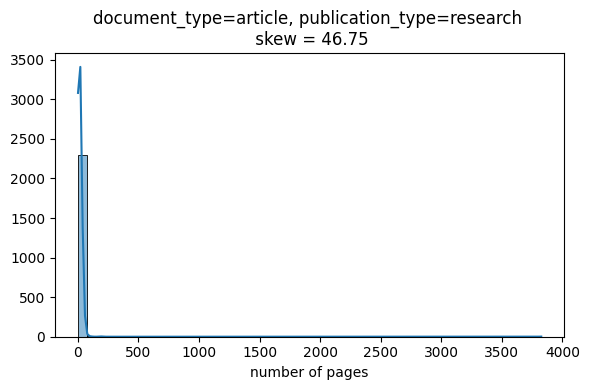

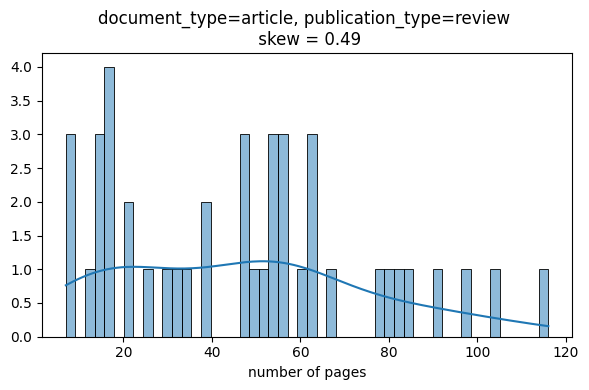

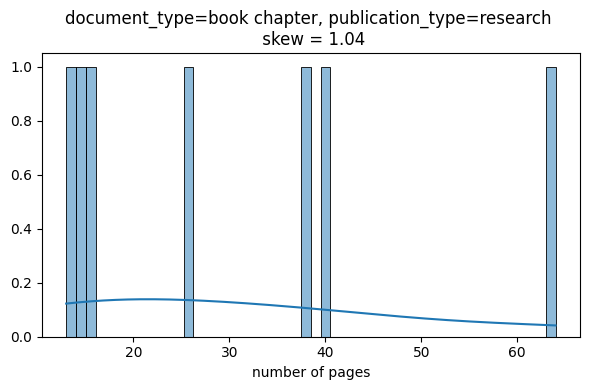

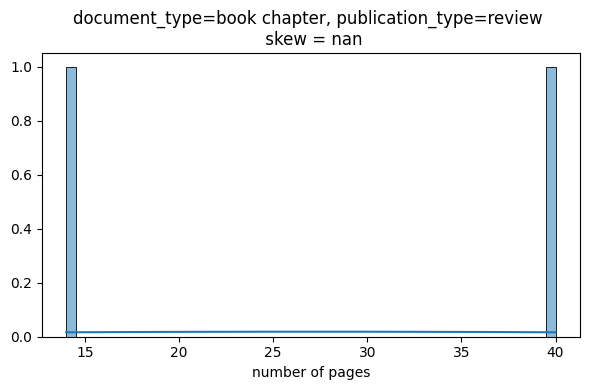

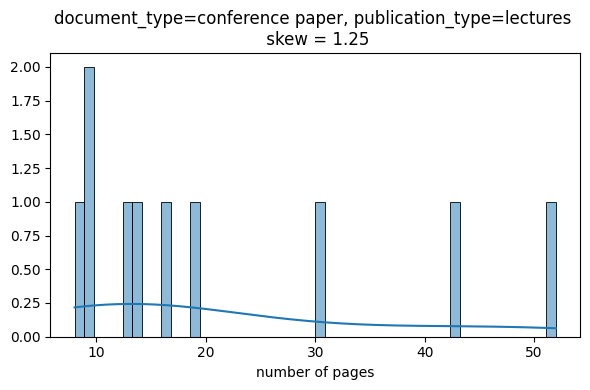

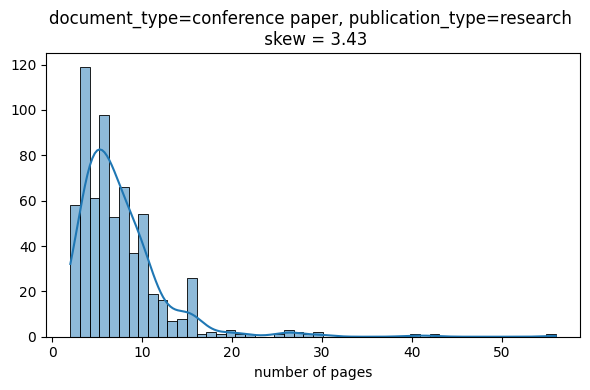

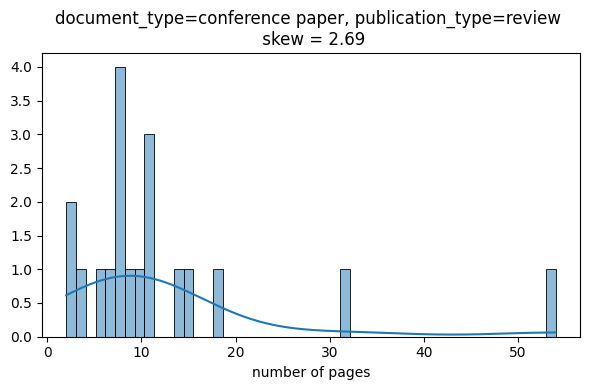

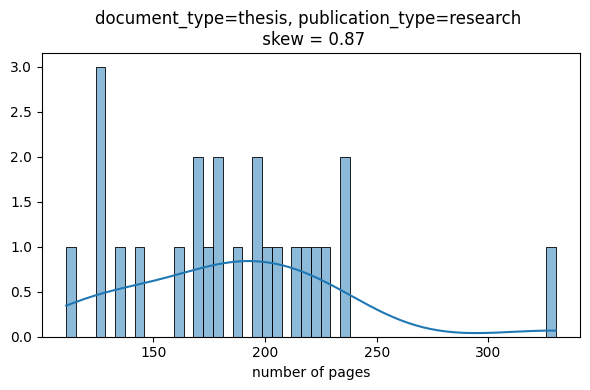

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

for (doc, pub), subdf in df.groupby(['document_type', 'publication_type']):
    plt.figure(figsize=(6, 4))
    sns.histplot(subdf, x='number_of_pages', kde=True, bins=50)
    plt.title(f"document_type={doc}, publication_type={pub} \n skew = {subdf['number_of_pages'].skew():.2f}")
    plt.xlabel("number of pages")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

They are not normally distributed. Therefore, it looks reasonable to replace Nan by medians based on its document and publication type.

In [72]:
df['number_of_pages'] = df.groupby(['document_type', 'publication_type'])['number_of_pages'].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

id                                       0
publication_info                         3
citation_count_without_self_citations    0
citation_count                           0
authors                                  0
citeable                                 0
references                               0
number_of_pages                          0
preprint_date                            1
author_count                             0
refereed                                 0
arxiv_eprints                            0
document_type                            0
publication_type                         0
dtype: int64

Next, let us consider the paper which does not have `preprint_date`.

In [73]:
df[df['preprint_date'].isnull()]

,id,publication_info,citation_count_without_self_citations,citation_count,authors,citeable,references,number_of_pages,preprint_date,author_count,refereed,arxiv_eprints,document_type,publication_type
145,419365,[{'conference_record': {'$ref': 'https://inspi...,2,2,[{'affiliations_identifiers': [{'schema': 'ROR...,True,[{'reference': {'publication_info': {'journal_...,6.0,NaN,2,False,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,research


In [74]:
df.iloc[145]['publication_info']

[{'conference_record': {'$ref': 'https://inspirehep.net/api/conferences/969077'},
  'parent_record': {'$ref': 'https://inspirehep.net/api/literature/459064'},
  'cnum': 'C96-05-22'},
 {'page_end': '440',
  'conference_record': {'$ref': 'https://inspirehep.net/api/conferences/970057'},
  'year': 1996,
  'page_start': '435',
  'parent_record': {'$ref': 'https://inspirehep.net/api/literature/429719'},
  'cnum': 'C96-03-23'}]

In [75]:
df.iloc[145]['arxiv_eprints']

[{'categories': ['nucl-th'], 'value': 'nucl-th/9606010'}]

From arXiv, it was first published on Thu, 6 Jun 1996 18:14:26 UTC. Replace this.

In [76]:
df.loc[145, 'preprint_date'] = '1996-06-06'

In [77]:
df.isnull().sum()

id                                       0
publication_info                         3
citation_count_without_self_citations    0
citation_count                           0
authors                                  0
citeable                                 0
references                               0
number_of_pages                          0
preprint_date                            0
author_count                             0
refereed                                 0
arxiv_eprints                            0
document_type                            0
publication_type                         0
dtype: int64

Lastly, let us take care of `publication_info`.

In [78]:
df[df['publication_info'].isnull()]

,id,publication_info,citation_count_without_self_citations,citation_count,authors,citeable,references,number_of_pages,preprint_date,author_count,refereed,arxiv_eprints,document_type,publication_type
1368,787313,NaN,11,14,"[{'full_name_unicode_normalized': 'diener, j. ...",True,[{'reference': {'arxiv_eprint': 'nucl-th/06020...,135.0,2008-06,1,True,"[{'categories': ['nucl-th'], 'value': '0806.07...",thesis,research
1698,940042,NaN,9,10,[{'affiliations_identifiers': [{'schema': 'ROR...,True,"[{'reference': {'label': 'A+ 86', 'publication...",172.0,2011-10,1,True,"[{'categories': ['nucl-th'], 'value': '1110.31...",thesis,research
2268,1613551,NaN,3,4,[{'affiliations_identifiers': [{'schema': 'ROR...,True,"[{'reference': {'label': '1', 'publication_inf...",237.0,2017-07-28,1,True,"[{'categories': ['nucl-th'], 'value': '1707.09...",thesis,research


They are all these and we use `publication_info` for more information about papers. Since it will not be used for testing our hypothesis, we should just keep it for reference even it is with `NaN`.

Lastly, we should add a column `number_of_references` from `references` by calculating its length.

In [79]:
df['number_of_references'] = df.apply(lambda x: len(x['references']), axis=1)

In [80]:
df.head()

,id,publication_info,citation_count_without_self_citations,citation_count,authors,citeable,references,number_of_pages,preprint_date,author_count,refereed,arxiv_eprints,document_type,publication_type,number_of_references
0,1459726,"[{'journal_volume': '594', 'page_end': '136', ...",10,20,"[{'raw_affiliations': [{'value': ""Departament ...",True,"[{'reference': {'label': '1', 'publication_inf...",20.0,1995-03-28,3,True,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",article,research,41
1,1459842,"[{'journal_volume': '351', 'page_end': '5', 'y...",4,4,[{'raw_affiliations': [{'value': 'Institute of...,True,"[{'reference': {'label': '1', 'publication_inf...",5.0,1995-04-07,2,True,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",article,research,19
2,1460442,"[{'journal_volume': '344', 'page_end': '34', '...",47,51,[{'raw_affiliations': [{'value': 'Department o...,True,"[{'reference': {'label': '1', 'publication_inf...",6.0,1995-01-17,2,True,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",article,research,17
3,392718,"[{'journal_volume': '340', 'page_end': '320', ...",1,1,[{'raw_affiliations': [{'value': 'Institut für...,True,[{'reference': {'publication_info': {'journal_...,12.0,1995-01,2,False,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",conference paper,research,16
4,397533,"[{'journal_volume': '363', 'page_end': '4', 'y...",65,67,[{'raw_affiliations': [{'value': 'High-Energy ...,True,[{'reference': {'publication_info': {'journal_...,4.0,1995-07,2,True,"[{'categories': ['nucl-th'], 'value': 'nucl-th...",article,research,17


In [81]:
df.to_csv("../data/data_nucl-th_100_preprocessed.csv", index=False)